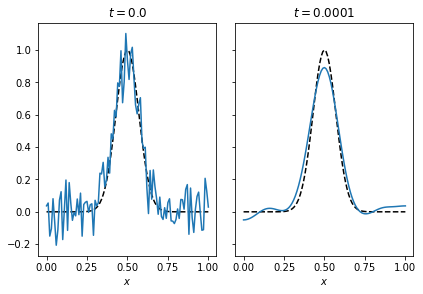

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix

def getD(n,h):
    e = np.ones(n)
    D = (1/h**4)*dia_matrix((np.array([e, -4*e, 6*e, -4*e, e]), np.array([-2,-1,0,1,2])), shape=(n, n)).toarray()
    
    D[0,:3] = [6/h**4,-8/h**4,2/h**4]
    D[1,:4] = [-4/h**4,7/h**4,-4/h**4,1/h**4]
    D[-2,-4:] = [1/h**4,-4/h**4,7/h**4,-4/h**4]
    D[-1,-3:] = [2/h**4,-8/h**4,6/h**4]
    return D


# parameters
nx = 101
dx = 1/(nx-1)
dt = 1e-8
nt = 10001
sigma = 1e-1
alpha = 1e-2

# operator
D = getD(nx,dx)

# ground truth and data
x = np.linspace(0,1,nx)
u_true = np.exp(-1e2*(x-.5)**2)
f_delta = u_true + sigma*np.random.randn(nx)

# solve
u = np.zeros((nt,nx))
u[0] = f_delta

for k in range(nt-1):
    u[k+1] = u[k] - dt*(u[k] + alpha*D@u[k] - f_delta)

# plot
index = [0, nt-1]
fig,ax = plt.subplots(1,len(index),sharey=True)
for k in range(len(index)):
    ax[k].plot(x,u_true,'k--')
    ax[k].plot(x,u[index[k]])
    ax[k].set_title('$t = $' + str(index[k]*dt))
    ax[k].set_xlabel('$x$')
    ax[k].set_aspect(1)
fig.tight_layout()

In [142]:
dx

0.01